# Case Study 04 NLP

# Machine Learning to predict public sentiment from text data

Look into twitter text data to predict if the given text has positive or negative sentiment towards a particular brand. The dataset includes twitter text related to Apple and Google products with user sentiment ranked between ‘positive’, ‘negative’, ‘neutral’ and ‘no_idea’,sentiments. Create a simpleRNN or LSTM based classifiers to classify tweets into the four classes. You can avoid ‘emotion_in_tweet_is_directed_at’ column.

In [1]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('judge-1377884607_tweet_product_company.csv')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [22]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].nunique()

4

In [23]:
messages = data[['tweet_text','is_there_an_emotion_directed_at_a_brand_or_product']]
messages.columns = ["Text","Label"]

In [24]:
pd.set_option('display.max_colwidth', None)
messages.head()

,Text,Label
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Positive emotion


In [25]:
messages['Label'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Label, dtype: int64

In [26]:
messages['Label'] = messages['Label'].map({'No emotion toward brand or product':2,'Positive emotion':3,'Negative emotion':1,"I can't tell":0})

<ipython-input-26-96f86a009bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages['Label'] = messages['Label'].map({'No emotion toward brand or product':2,'Positive emotion':3,'Negative emotion':1,"I can't tell":0})


In [27]:
messages.head()

,Text,Label
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",1
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",3
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,3
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,1
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",3


In [28]:
messages['Label'].value_counts()

2    5389
3    2978
1     570
0     156
Name: Label, dtype: int64

In [31]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9092 non-null   object
 1   Label   9093 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.2+ KB


In [32]:
messages = messages.dropna()

In [33]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9092 non-null   object
 1   Label   9092 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 213.1+ KB


In [34]:
from keras.preprocessing import text
tokenizer = text.Tokenizer() 
tokenizer.fit_on_texts(list(messages['Text']))
tokenized_texts = tokenizer.texts_to_sequences(messages['Text'])

In [36]:
tokenized_texts[0]

[5861,
 23,
 51,
 11,
 606,
 18,
 258,
 112,
 2578,
 633,
 6,
 1348,
 25,
 32,
 87,
 889,
 23,
 105,
 5,
 1108,
 2579,
 3948,
 6,
 1]

In [35]:
len(tokenizer.word_index)

10115

In [37]:
from keras.utils import pad_sequences
X = pad_sequences(tokenized_texts, maxlen=100)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, messages['Label'].values, test_size=0.2)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,SimpleRNN,Dropout

In [41]:
model = Sequential()

model.add(Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128,input_length=100))
model.add(SimpleRNN(10))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  

In [42]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1294848   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                1390      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
Total params: 1,296,992
Trainable params: 1,296,992
Non-

In [46]:
history = model.fit(X_train, y_train, epochs=25,validation_split=0.1)

Epoch 1/25
205/205 [==============================] - 16s 78ms/step - loss: 0.1818 - accuracy: 0.9341 - val_loss: 2.1228 - val_accuracy: 0.5893
Epoch 2/25
205/205 [==============================] - 19s 91ms/step - loss: 0.1936 - accuracy: 0.9283 - val_loss: 2.0648 - val_accuracy: 0.5934
Epoch 3/25
205/205 [==============================] - 19s 91ms/step - loss: 0.1862 - accuracy: 0.9300 - val_loss: 2.1298 - val_accuracy: 0.6071
Epoch 4/25
205/205 [==============================] - 20s 95ms/step - loss: 0.1852 - accuracy: 0.9345 - val_loss: 2.0666 - val_accuracy: 0.6030
Epoch 5/25
205/205 [==============================] - 19s 93ms/step - loss: 0.1792 - accuracy: 0.9367 - val_loss: 2.1687 - val_accuracy: 0.5934
Epoch 6/25
205/205 [==============================] - 16s 76ms/step - loss: 0.1686 - accuracy: 0.9381 - val_loss: 2.0734 - val_accuracy: 0.6126
Epoch 7/25
205/205 [==============================] - 18s 90ms/step - loss: 0.1784 - accuracy: 0.9375 - val_loss: 2.1959 - val_accuracy:

In [48]:
y_pred = model.predict(X_test)

57/57 [==============================] - 1s 10ms/step


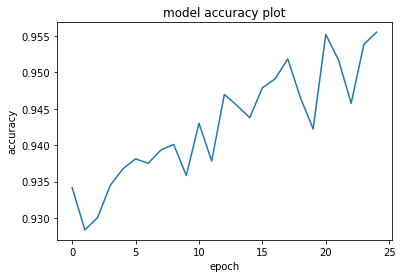

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# plotting accuracy plot

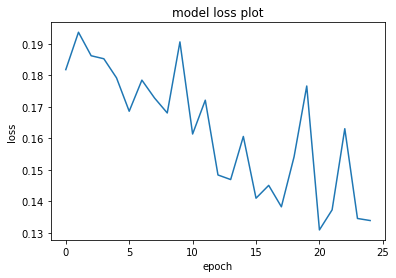

In [51]:
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#plotting loss plot

##### Jibin K Joy, KKEM ML & AI August Batch 2022